In this Jupyter Notebook there is the application of PCA over 
the "Pima Indians Diabetes" dataset.
The canonical representation of a dataset is the following.<br>
It is a datamatrix $X \in R^{n \times p}$ where: <br>
$\hspace{1cm}\bullet \hspace{0.5cm}n$ is the number of samples<br>
$\hspace{1cm}\bullet \hspace{0.5cm}p$ is the number of the features

On the rows there are samples while on the columns there are features:<br>
$\hspace{1cm}\bullet \hspace{0.5cm} x_{i} \in R^{p} \rightarrow$ each sample is a vector in a $p$-dimensional space <br>
$\hspace{1cm}\bullet \hspace{0.5cm} p_{j} \in R^{n} \rightarrow$ each feature is a vector in a $n$-dimensional space <br>


In [1]:
import funcs
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import datasets
print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))
print("Matplotlib Version: {}".format(matplotlib.__version__))
print("Scikit-learn Version: {}".format(sklearn.__version__))
print("Seaborn Version: {}".format(sns.__version__))
np.set_printoptions(suppress=True, linewidth=130)

Pandas Version: 1.0.3
Numpy Version: 1.18.4
Matplotlib Version: 3.2.1
Scikit-learn Version: 0.23.1
Seaborn Version: 0.10.1


Now it will be loaded the dataset about arrests in USA

In [2]:
dataframe = pd.read_csv("datasets/diabetes.csv")
n = np.shape(dataframe)[0]
p = np.shape(dataframe)[1]
print("Shape of Dataset: {}\n\t* Number of samples:\t{}\n\t* Number of features:\t{}"
      .format(np.shape(dataframe), n, p))

Shape of Dataset: (768, 9)
	* Number of samples:	768
	* Number of features:	9


This is a first inspection about<br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Type of columns<br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Missing values

In [3]:
print(funcs.InfoColumns(dataframe))

                Column Name     Type  Null Values
0               Pregnancies    int64            0
1                   Glucose    int64            0
2             BloodPressure    int64            0
3             SkinThickness    int64            0
4                   Insulin    int64            0
5                       BMI  float64            0
6  DiabetesPedigreeFunction  float64            0
7                       Age    int64            0
8                   Outcome    int64            0


These are some statistics useful to steer the whole analysis:<br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Descriptive statistics <br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Skewness <br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Kurtosis <br>


In [4]:
print(dataframe.describe(include='all'))

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
print(dataframe.drop(['Outcome'], axis=1).skew(axis=0))

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64


In [6]:
print("\n",dataframe.drop(['Outcome'], axis=1).kurtosis(axis=0))


 Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
dtype: float64


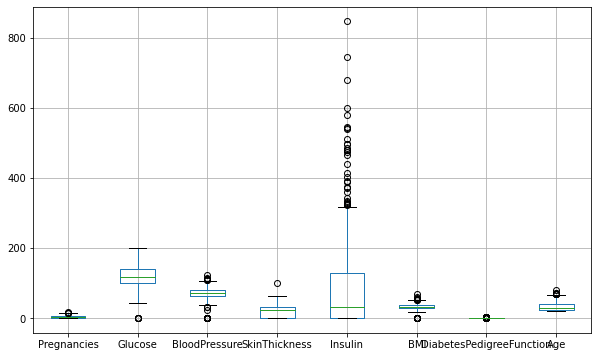

In [7]:
plt.figure(figsize=(10,6))
dataframe.drop(['Outcome'], axis=1).boxplot(figsize=(10,6))
plt.savefig("images/boxplot_diabetes.png")

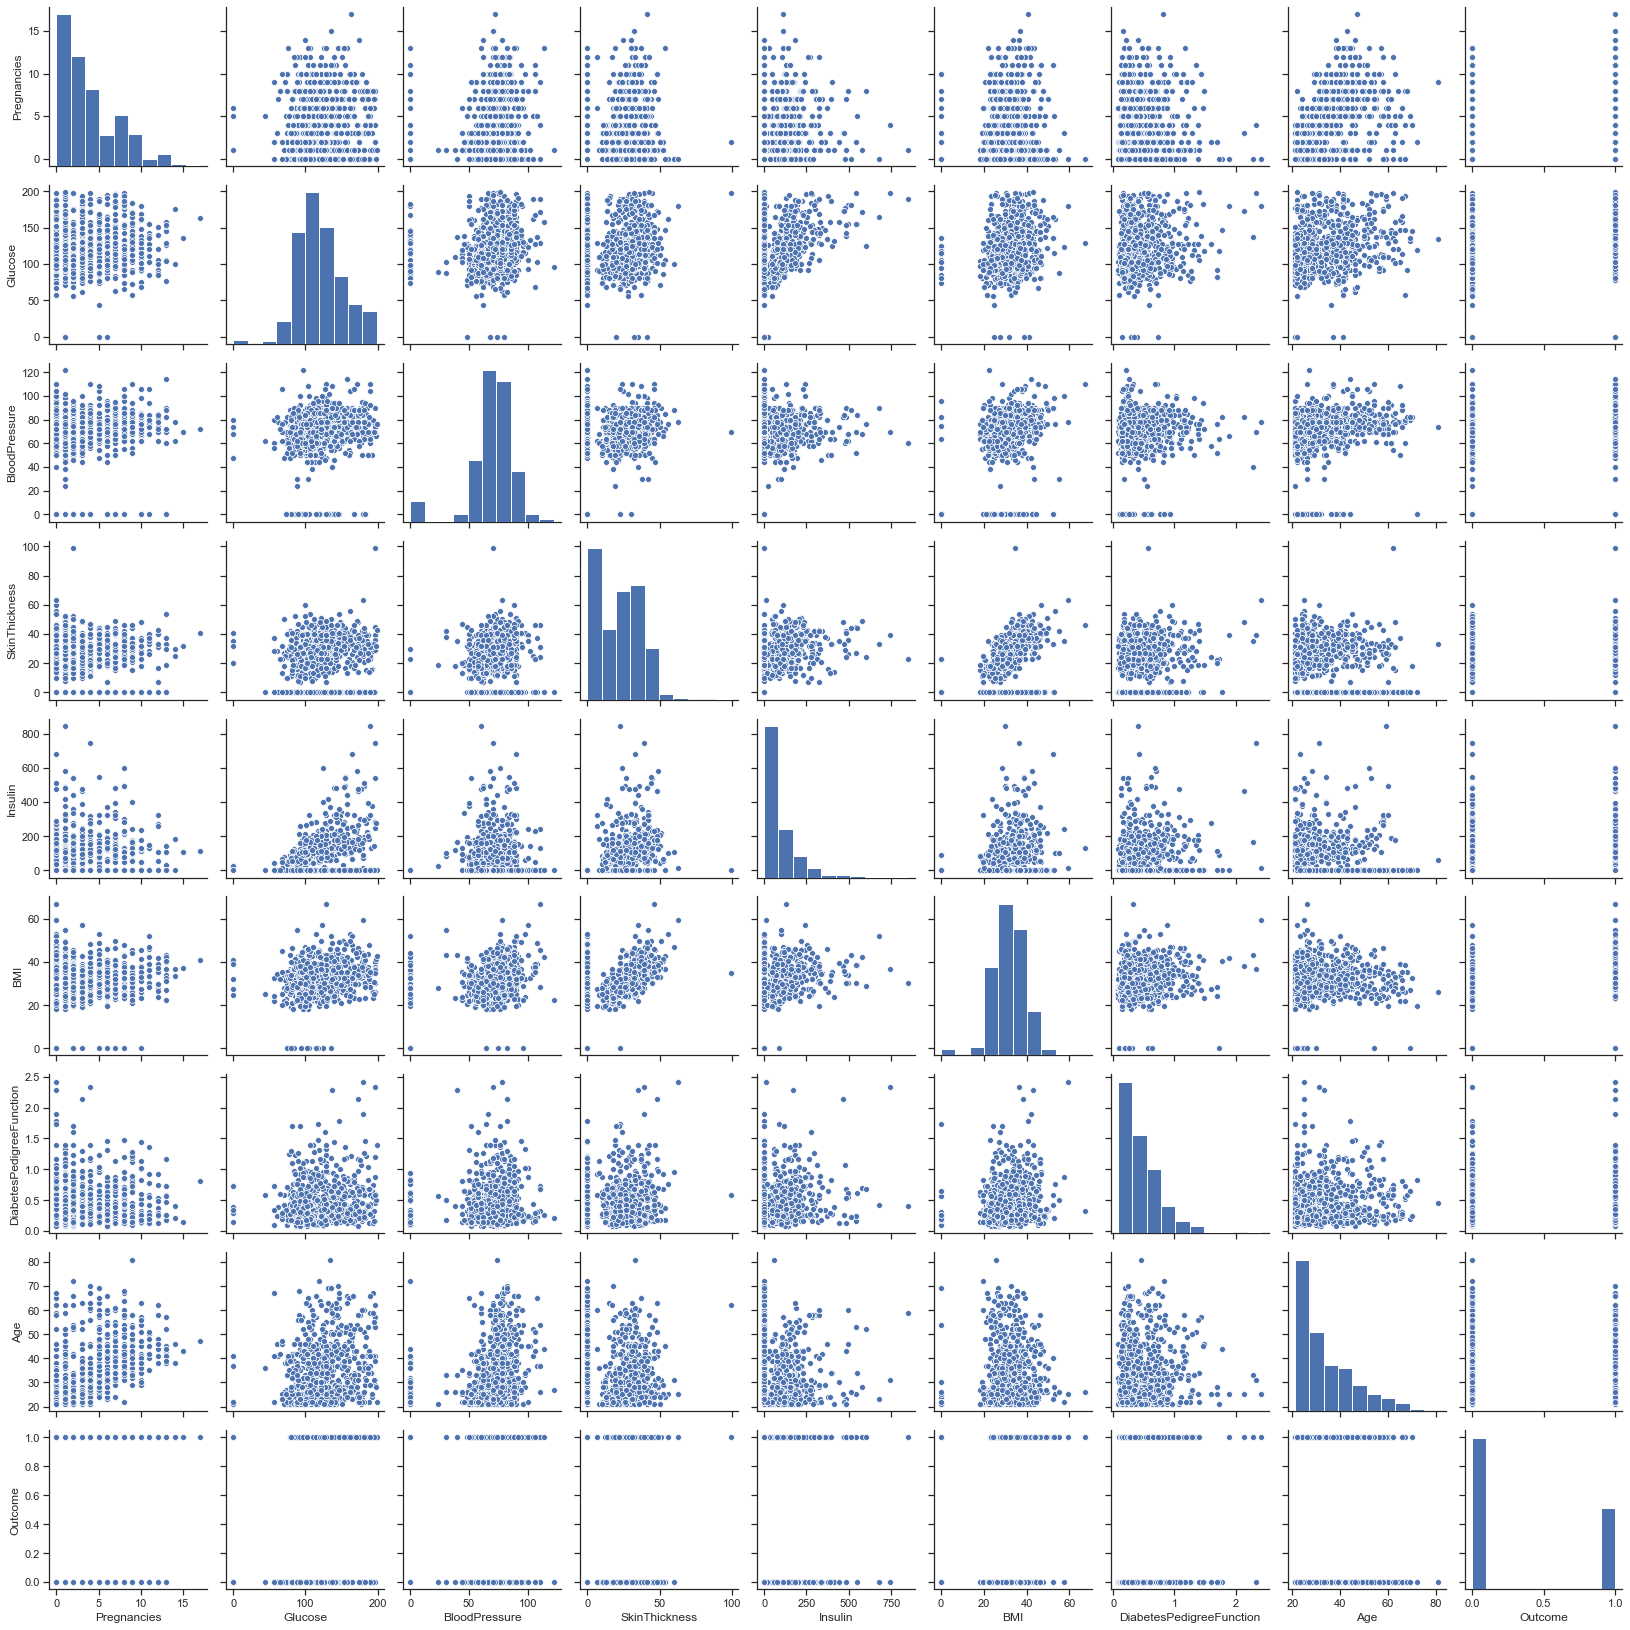

In [8]:
sns.set(style="ticks", color_codes=True)
scatter = sns.pairplot(data=dataframe, markers='o')
scatter.savefig("images/scatter_diabetes.png")

Now it will computed the centered version of the dataset.<br>
***
What does it means?<br>
***
In this way, it's performed a shift from the original canonical axis into the center of the distribution of the 
dataset.<br>
It's computed an approximation which allows to discuss about the linear relationships (if exist) among features

In this specific case it has been dropped the columns about brand and id

In [9]:
X = dataframe.drop(['Outcome'], axis=1).values

In [10]:
Xc = X - np.mean(X, axis=0)

Now there are two different strategies: <br>
***
PCA over the Covariance Matrix $C_{X_{C}}$<br> 
if the variances respect the order of importance that we want to attribute to the variables (it's defined a hierarchy 
based on relevance)<br>
PCA over the Correlation Matrix $R_{X_{C}}$ <br>
if we want to attribute the same importance to all the variables<br>

***
HOW CAN WE CHOOSE WHAT MATRIX TO USE?
***
It must be computed some statistical measures over the original dataset (this is a multivariate case, since $p>1$) and 
check what is the variance of each feature.<br>
In particular, if there is an high difference among variances, due to different measurement units, then it is 
recommended to compute the Correlation Matrix.
***
NB:: If the centered matrix $X_{C}$ is standardized, then $\implies (C_{X_{C}} = R_{X_{C}})$

Now it will be computed both the Covariance Matrix $C_{X_{C}}$ and the Correlation Matrix $R_{X_{C}}$ on the 
transpose of the centered dataset $C_{{(X)}^{T}}$, because the goal of this analysis is find, if exist, 
some relations among features and not samples.
***
(NB) Computing the Covariance matrix on the centered dataset is equivalent to compute it on the original ones

In [11]:
Cov_Xc = np.cov(Xc.T)
print("This is the Covariance Matrix C of the Transpose Centered Dataset:\n\n{}"
      .format(np.array_str(Cov_Xc)))

This is the Covariance Matrix C of the Transpose Centered Dataset:

[[   11.35405632    13.94713066     9.21453818    -4.39004101   -28.55523074     0.46977418    -0.03742597    21.57061977]
 [   13.94713066  1022.24831425    94.43095563    29.23918269  1220.93579897    55.72698674     1.45487481    99.08280537]
 [    9.21453818    94.43095563   374.64727123    64.02939619   198.37841224    43.00469514     0.26463757    54.52345278]
 [   -4.39004101    29.23918269    64.02939619   254.47324533   802.97994079    49.37386938     0.97213555   -21.3810232 ]
 [  -28.55523074  1220.93579897   198.37841224   802.97994079 13281.18007796   179.77517214     7.06668051   -57.14329028]
 [    0.46977418    55.72698674    43.00469514    49.37386938   179.77517214    62.15998396     0.36740469     3.36032992]
 [   -0.03742597     1.45487481     0.26463757     0.97213555     7.06668051     0.36740469     0.10977864     0.13077169]
 [   21.57061977    99.08280537    54.52345278   -21.3810232    -57.143

In [12]:
Corr_Xc = np.corrcoef(Xc.T)
print("This is the Correlation Matrix R of the Transpose Centered Dataset:\n\n{}"
      .format(np.array_str(Corr_Xc)))

This is the Correlation Matrix R of the Transpose Centered Dataset:

[[ 1.          0.12945867  0.14128198 -0.08167177 -0.07353461  0.01768309 -0.03352267  0.54434123]
 [ 0.12945867  1.          0.15258959  0.05732789  0.33135711  0.22107107  0.1373373   0.26351432]
 [ 0.14128198  0.15258959  1.          0.20737054  0.08893338  0.28180529  0.04126495  0.23952795]
 [-0.08167177  0.05732789  0.20737054  1.          0.43678257  0.3925732   0.18392757 -0.11397026]
 [-0.07353461  0.33135711  0.08893338  0.43678257  1.          0.19785906  0.18507093 -0.04216295]
 [ 0.01768309  0.22107107  0.28180529  0.3925732   0.19785906  1.          0.14064695  0.03624187]
 [-0.03352267  0.1373373   0.04126495  0.18392757  0.18507093  0.14064695  1.          0.03356131]
 [ 0.54434123  0.26351432  0.23952795 -0.11397026 -0.04216295  0.03624187  0.03356131  1.        ]]


Then it will be computed the eigenvalues and eigenvectors of both matrices.

In [13]:
eigenvalues_covariance, eigenvectors_covariance = np.linalg.eig(Cov_Xc)
print("These are the eigenvalues of Covariance Matrix C:\n{}\n".format(np.array_str(eigenvalues_covariance)))
print("These are the eigenvectors of the Covariance Matrix C:\n{}".format(np.array_str(eigenvectors_covariance)))

These are the eigenvalues of Covariance Matrix C:
[13456.57298102   932.76013231   390.57783115   198.18269105   112.68911496    45.82944307     7.76070899     0.10287102]

These are the eigenvectors of the Covariance Matrix C:
[[-0.00202177  0.02264889 -0.0224649  -0.04904596  0.15161287  0.00504731 -0.98667299 -0.00610123]
 [ 0.09781158  0.97221004  0.14342871  0.11983002 -0.08794077 -0.05073918 -0.00088343  0.00082546]
 [ 0.01609305  0.14190933 -0.92246719 -0.26274279 -0.23216501 -0.07563655  0.00122976 -0.00052087]
 [ 0.06075669 -0.05786147 -0.30701306  0.88436938  0.25997349 -0.22136307  0.00037644  0.00254872]
 [ 0.99311084 -0.09462669  0.0209773  -0.06555036 -0.00017231  0.00613326 -0.00142307  0.00026897]
 [ 0.01401081  0.04697298 -0.13244454  0.19280173  0.02147448  0.97077671  0.00273046  0.00267342]
 [ 0.00053717  0.0008168  -0.00063998  0.00269909  0.00164081  0.00202904  0.00634403 -0.99997215]
 [-0.00356474  0.14016818 -0.12545431 -0.30102433  0.9205049   0.01511332  0.16

In [14]:
eigenvalues_correlation, eigenvectors_correlation = np.linalg.eig(Corr_Xc)
print("These are the eigenvalues of Correlation Matrix R:\n{}\n".format(np.array_str(eigenvalues_correlation)))
print("These are the eigenvectors of the Correlation Matrix R:\n{}".format(np.array_str(eigenvectors_correlation)))

These are the eigenvalues of Correlation Matrix R:
[2.09437995 1.73121014 0.41981618 0.40446205 0.68262839 0.76234439 0.87552904 1.02962987]

These are the eigenvectors of the Correlation Matrix R:
[[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573 -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804  0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306 -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206 -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481  0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376 -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049 -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996 -0.0712006  -0.07524755]]


The matrix of eigenvectors (for C and R) represent the rotation matrix $A_{p}$ such that:<br>
$Y = X \cdot A_{p}$ where 
\begin{cases}
\bullet \hspace{0.5cm} Y \in R^{n \times p} \rightarrow \text{ this is the matrix of scores (PC's)}\\
\bullet \hspace{0.5cm} X \in R^{n \times p}  \rightarrow \text{ this is the original matrix}\\
\bullet \hspace{0.5cm} A_{p} \in R^{p \times p}  \rightarrow \text{this is the matrix of loadings}
\end{cases} <br>
The matrix $A_{p}$ rotates original data into the direction of maximum variance of the dataset and is useful to:<br>
$\hspace{1cm} 1. \hspace{0.5cm}$ Perform a feature selection of the original variables<br>
$\hspace{1cm} 2. \hspace{0.5cm}$ Gives Interpretation of the PC's <br>
$\hspace{2.3cm} (\bullet) \hspace{0.5cm}$in terms of magnitude of absolute values of axis<br>
$\hspace{2.3cm} (\bullet) \hspace{0.5cm}$using the correlation coefficients among PC's and original features $X_{i}$<br>

### Let's consider the matrix $A_{p}$ related to the Covariance Matrix $C$
In the column 1, the max absolute value is situated in position 5.<br>
Hence, the feature 'Insulin' is going to be relevant for the construction of $Y_{1}$<br><br>
In the column 2, the max absolute value is situated in position 2.<br>
Hence, the feature 'Glucose' is going to be relevant for the construction of $Y_{2}$<br><br>
In the column 3, the max absolute value is situated in position 3.<br>
Hence, the feature 'Blood Pressure' is going to be relevant for the construction of $Y_{3}$<br><br>
In the column 4, the max absolute value is situated in position 4.<br>
Hence, the feature 'Skin Thickness' is going to be relevant for the construction of $Y_{4}$<br><br>
In the column 5, the max absolute value is situated in position 8.<br>
Hence, the feature 'Age' is going to be relevant for the construction of $Y_{5}$<br><br>
In the column 6, the max absolute value is situated in position 6.<br>
Hence, the feature 'BMI' is going to be relevant for the construction of $Y_{6}$<br><br>
In the column 7, the max absolute value is situated in position 1.<br>
Hence, the feature 'Pregnancies' is going to be relevant for the construction of $Y_{7}$<br><br>
In the column 8, the max absolute value is situated in position 7.<br>
Hence, the feature 'Diabetes Pedigree Function' is going to be relevant for the construction of $Y_{8}$

***

### Let's consider the matrix $A_{p}$ related to the Correlation Matrix $R$
In the column 1, the max absolute value is situated in position 6.<br>
Hence, the feature 'BMI' is going to be relevant for the construction of $Y_{1}$<br><br>
In the column 2, the max absolute value is situated in position 8.<br>
Hence, the feature 'Age' is going to be relevant for the construction of $Y_{2}$<br><br>
In the column 3, the max absolute value is situated in position 8.<br>
Hence, the feature 'Age' is going to be relevant for the construction of $Y_{3}$<br><br>
In the column 4, the max absolute value is situated in position 4.<br>
Hence, the feature 'Skin Thickness' is going to be relevant for the construction of $Y_{4}$<br><br>
In the column 5, the max absolute value is situated in position 6.<br>
Hence, the feature 'BMI' is going to be relevant for the construction of $Y_{5}$<br><br>
In the column 6, the max absolute value is situated in position 4.<br>
Hence, the feature 'Skin Thickness' is going to be relevant for the construction of $Y_{6}$<br><br>
In the column 7, the max absolute value is situated in position 7.<br>
Hence, the feature 'Diabetes Pedigree Function' is going to be relevant for the construction of $Y_{7}$<br><br>
In the column 8, the max absolute value is situated in position 3.<br>
Hence, the feature 'Blood Pressure' is going to be relevant for the construction of $Y_{8}$

Now it can be computed the matrix $Y$ (hence, the principal components), and it can be defined also a semantic for 
the new features (PC's) through by the study of correlations among original features $X_{i}$ and 
principal components $Y_{j}$.

In [15]:
YC = Xc.dot(eigenvectors_covariance)
print("This is the dimension of the Y matrix \t {}\n\t(*) using the loadings of the covariance matrix C\n"
      "\t(*) It must be equal to the dimension of the original dataset\n".format(np.shape(YC)))

This is the dimension of the Y matrix 	 (768, 8)
	(*) using the loadings of the covariance matrix C
	(*) It must be equal to the dimension of the original dataset



In [16]:
YR = Xc.dot(eigenvectors_correlation)
print("This is the dimension of the Y matrix \t {}\n\t(*) using the loadings of the correlation matrix R\n"
      "\t(*) It must be equal to the dimension of the original dataset".format(np.shape(YR)))

This is the dimension of the Y matrix 	 (768, 8)
	(*) using the loadings of the correlation matrix R
	(*) It must be equal to the dimension of the original dataset


Now it's shown the Scree-Plot, useful to choose what is the number of components $(k)$
that is better to retained in order to account for most of the variation in the dataset. <br>
The number $k$ has been computed using the Cumulative Percentage of Total Variation.<br> 
$\hspace{1cm}(\bullet)\hspace{0.3cm}C \rightarrow t_{k} = 100 \cdot \frac{\sum_{i=1}^{k}\lambda_{i}}{\sum_{i=1}^{p}\lambda_{i}} = 
100 \cdot \frac{\sum_{i=1}^{k}\lambda_{i}}{trace(C_{X})}$<br><br>

$\hspace{1cm}(\bullet)\hspace{0.3cm}R \rightarrow t_{k} = 100 \cdot \frac{\sum_{i=1}^{k}\lambda_{i}}{p}$<br><br>

This is the explained variance of each feature (covariance):
	[88.85  6.16  2.58  1.31  0.74  0.3   0.05  0.  ]
This is the cumulative variance (covariance):
	[ 88.85  95.01  97.59  98.9   99.65  99.95 100.   100.  ]


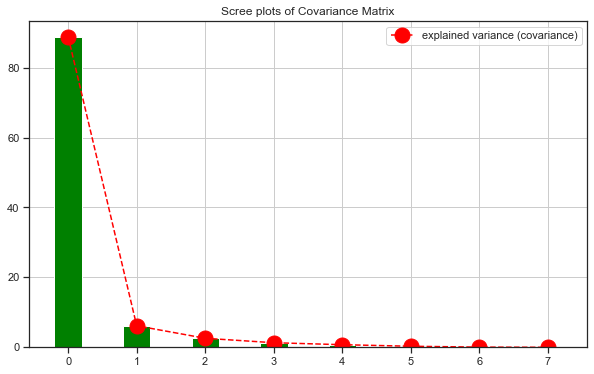

In [17]:
total_variation_covariance = np.sum(eigenvalues_covariance)
explained_variance_covariance = np.asarray(
    [100*(i/total_variation_covariance) for i in sorted(eigenvalues_covariance, reverse=True)])
print("This is the explained variance of each feature (covariance):\n\t{}"
      .format(np.array_str(explained_variance_covariance, precision=2)))
cumulative_covariance = np.cumsum(explained_variance_covariance)
print("This is the cumulative variance (covariance):\n\t{}"
      .format(np.array_str(cumulative_covariance, precision=2)))

fig1 = plt.figure(1, figsize=(10,6))
plt.title("Scree plots of Covariance Matrix")
plt.bar(x=np.arange(np.shape(explained_variance_covariance)[0]), 
        height=explained_variance_covariance, 
        width=0.4, color="green")
plt.plot(np.arange(np.shape(explained_variance_covariance)[0]), 
         explained_variance_covariance, 
         linestyle="--", marker="o", markersize=15,
         color="red", label="explained variance (covariance)")
plt.legend()
plt.grid()
plt.savefig("images/screeplot_covariance_diabetes.png")
plt.show()

This is the explained variance of each feature (correlation):
	[26.18 21.64 12.87 10.94  9.53  8.53  5.25  5.06]
This is the cumulative variance (correlation):
	[ 26.18  47.82  60.69  71.63  81.16  89.7   94.94 100.  ]


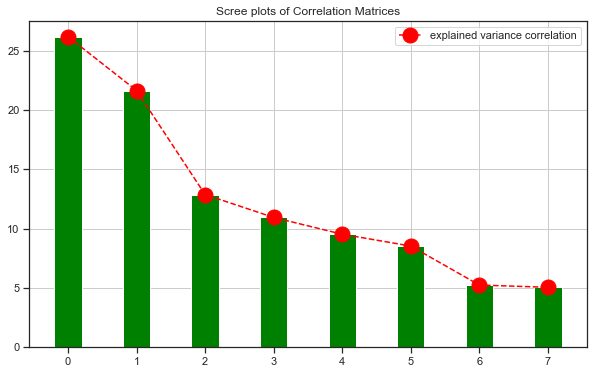

In [18]:
total_variation_correlation = np.sum(eigenvalues_correlation)
explained_variance_correlation = np.asarray(
    [100*(i/total_variation_correlation) for i in sorted(eigenvalues_correlation, reverse=True)])
print("This is the explained variance of each feature (correlation):\n\t{}"
      .format(np.array_str(explained_variance_correlation, precision=2)))
cumulative_correlation = np.cumsum(explained_variance_correlation)
print("This is the cumulative variance (correlation):\n\t{}"
      .format(np.array_str(cumulative_correlation, precision=2)))

fig2 = plt.figure(2, figsize=(10,6))
plt.title("Scree plots of Correlation Matrices")
plt.bar(x=np.arange(np.shape(explained_variance_correlation)[0]), 
        height=explained_variance_correlation, 
        width=0.4, color="green")
plt.plot(np.arange(np.shape(explained_variance_correlation)[0]), 
         explained_variance_correlation, 
         linestyle="--", marker="o", markersize=15,
         color="red", label="explained variance correlation")

plt.legend()
plt.grid()
plt.savefig("images/screeplot_correlation_diabetes.png")
plt.show()

In [19]:
number_k = 2

### Correlation circle (Original features and PC's of the covariance matrix C)

In [20]:
CC_Covariance = []
for i in range(np.shape(X)[1]):
    f = []
    for j in range(number_k):
        c = (np.corrcoef(X[:,i], YC[:,j])[0])[1]
        f.append(c)
    CC_Covariance.append(f)


CorrelationCircle_Covariance = np.asarray(CC_Covariance)
print(CorrelationCircle_Covariance)

[[-0.06960214  0.20528457]
 [ 0.35487818  0.9286817 ]
 [ 0.09644824  0.22391575]
 [ 0.44181479 -0.11077797]
 [ 0.99964691 -0.02507727]
 [ 0.20614604  0.18196071]
 [ 0.18806951  0.07529121]
 [-0.0351625   0.36401439]]


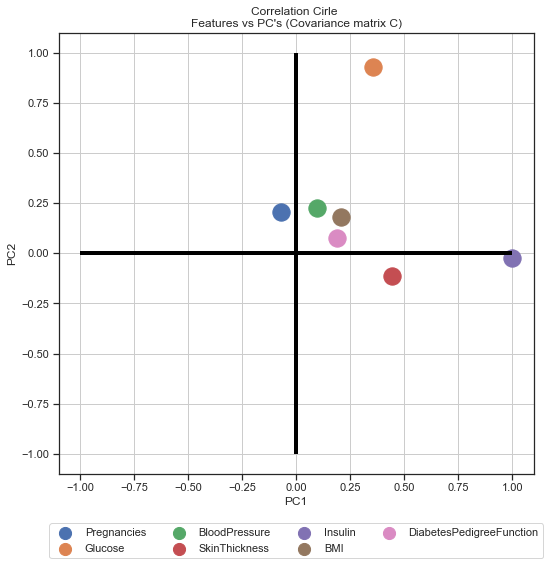

In [21]:
fig3 = plt.figure(figsize=(8,8))
plt.title("Correlation Cirle \nFeatures vs PC's (Covariance matrix C)")
plt.hlines(y=0, xmin=-1, xmax=1, colors='black', linewidth=4, linestyle='solid')
plt.vlines(x=0, ymin=-1, ymax=1, colors='black', linewidth=4, linestyle='solid')
for i in range(0,np.shape(X)[1]-1):
    plt.scatter(CorrelationCircle_Covariance[i:i+1,0:1], 
                CorrelationCircle_Covariance[i:i+1,1:2], s=300, label=dataframe.columns[i])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           fancybox=True, ncol=int(np.shape(X)[1]/2), markerscale=0.7)
plt.grid()
plt.tight_layout()
plt.savefig("images/circle_correlation_covariance_diabetes.png")
plt.show()

### Correlation circle (Original features and PC's of the correlation matrix R)

In [22]:
number_k = 3

In [23]:
CC_Correlation = []
for i in range(np.shape(X)[1]):
    f = []
    for j in range(number_k):
        c = (np.corrcoef(X[:,i], YR[:,j])[0])[1]
        f.append(c)
    CC_Correlation.append(f)


CorrelationCircle_Correlation = np.asarray(CC_Correlation)
print(CorrelationCircle_Correlation)

[[-0.00182987 -0.29798101  0.1551654 ]
 [-0.52318863  0.05420668 -0.32829438]
 [-0.26759744 -0.07784141 -0.16969103]
 [-0.52446742  0.5559999  -0.2394909 ]
 [-0.95422969  0.90765522 -0.88222473]
 [-0.34347309  0.18554344 -0.16631868]
 [-0.2156406   0.16475385 -0.12946405]
 [-0.07760981 -0.38229118  0.36635613]]


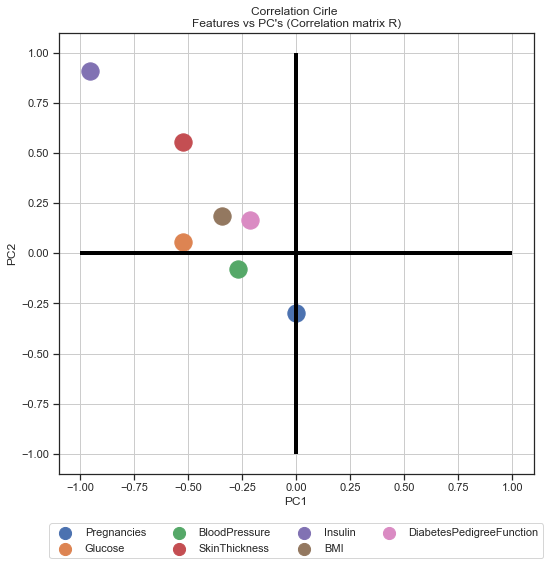

In [24]:
fig4 = plt.figure(figsize=(8,8))
plt.title("Correlation Cirle \nFeatures vs PC's (Correlation matrix R)")
plt.hlines(y=0, xmin=-1, xmax=1, colors='black', linewidth=4, linestyle='solid')
plt.vlines(x=0, ymin=-1, ymax=1, colors='black', linewidth=4, linestyle='solid')
for i in range(0,np.shape(X)[1]-1):
    plt.scatter(CorrelationCircle_Correlation[i:i+1,0:1], 
                CorrelationCircle_Correlation[i:i+1,1:2], 
                s=300, label=dataframe.columns[i])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           fancybox=True, ncol=int(np.shape(X)[1]/2), markerscale=0.7)
plt.grid()
plt.tight_layout()
plt.savefig("images/circle_correlation_correlation_diabetes.png")
plt.show()

# Conclusion

### Covariance Matrix 
Using the Covariance matrix $C_{X}$ to perform PCA and choose a $k = 2$ (qualitative analysis) which is the number 
of components that retains $\sim 95\%$ of total information embedded in the dataset, it can be found that:<br>
$\hspace{1cm}(\bullet)\hspace{0.3cm}$ PC1 is an index of the correct pancreatic functions (Insulin (5))<br>
$\hspace{1cm}(\bullet)\hspace{0.3cm}$ PC2 is an index of the correct level of production of glaucose (Glaucose (2))

### Correlation Matrix 
Using the Correlation matrix $R_{X}$ to perform PCA and choose a $k = 3$ (qualitative analysis) which is the number 
of components that retains $\sim 61\%$ of total information embedded in the dataset, it can be found that
all three PC's represent and index of Insulina and also very low values for the other features
if they are project in the 3D space.

NB: It has been provided just a 2D representation of the correlation circle related to PCA performed 
through the correlation matrix 
